In [1]:
import polars as pl
import pandas as pd
import numpy as np
import os
import feather
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150
%matplotlib inline

In [2]:
rawDf = []
for filename in os.listdir('./nfb2023'):
    monthlyDf = pl.from_pandas(feather.read_dataframe(f"./nfb2023/{filename}"))
    if (len(rawDf) == 0):
        rawDf.append(monthlyDf)
    else:
        currDf = pl.concat(rawDf)
        monthlyDf = monthlyDf.filter(pl.col('VDID').is_in(set(currDf['VDID'])))
        rawDf.append(monthlyDf)
rawDf = pl.concat(rawDf)
rawDf

VDID,RoadName,Start,End,RoadDirection,Speed,Occupancy,Volume,ActualLaneNum,LocationMile,isTunnel,DataCollectTime
str,str,str,str,str,f64,f64,f64,i64,f64,i64,datetime[ns]
"""VD-N5-N-0.178-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",-99.0,-99.0,-99.0,2,0.178,0,2023-01-01 00:04:00
"""VD-N5-N-0.706-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",-99.0,-99.0,-99.0,2,0.706,0,2023-01-01 00:04:00
"""VD-N5-N-1.068-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",-99.0,-99.0,-99.0,2,1.068,1,2023-01-01 00:04:00
"""VD-N5-N-2.068-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",94.6,4.1,5.3,2,2.068,1,2023-01-01 00:04:00
"""VD-N5-N-3.198-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",90.8,4.8,5.1,2,3.198,1,2023-01-01 00:04:00
…,…,…,…,…,…,…,…,…,…,…,…
"""VD-N5-S-41.298…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",92.5,1.6667,2.6667,2,41.298,0,2023-12-31 23:57:00
"""VD-N5-S-44.202…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",84.3333,2.3333,3.3333,2,44.202,0,2023-12-31 23:57:00
"""VD-N5-S-46.566…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",65.8333,1.8333,1.5,2,46.566,0,2023-12-31 23:57:00


In [3]:
filtDf = rawDf.filter((pl.col('Volume')>=0) & (pl.col('Speed')>=0) & (pl.col('Occupancy')>=0))
filtDf

VDID,RoadName,Start,End,RoadDirection,Speed,Occupancy,Volume,ActualLaneNum,LocationMile,isTunnel,DataCollectTime
str,str,str,str,str,f64,f64,f64,i64,f64,i64,datetime[ns]
"""VD-N5-N-2.068-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",94.6,4.1,5.3,2,2.068,1,2023-01-01 00:04:00
"""VD-N5-N-3.198-…","""國道5號""","""南港系統交流道""","""石碇交流道""","""N""",90.8,4.8,5.1,2,3.198,1,2023-01-01 00:04:00
"""VD-N5-N-9.840-…","""國道5號""","""石碇交流道""","""坪林交控交流道""","""N""",86.1,2.7,3.8,2,9.84,1,2023-01-01 00:04:00
"""VD-N5-N-11.903…","""國道5號""","""石碇交流道""","""坪林交控交流道""","""N""",86.1,2.3,3.2,2,11.903,1,2023-01-01 00:04:00
"""VD-N5-N-14.550…","""國道5號""","""石碇交流道""","""坪林交控交流道""","""N""",88.0,2.7,3.4,2,14.55,0,2023-01-01 00:04:00
…,…,…,…,…,…,…,…,…,…,…,…
"""VD-N5-S-41.298…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",92.5,1.6667,2.6667,2,41.298,0,2023-12-31 23:57:00
"""VD-N5-S-44.202…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",84.3333,2.3333,3.3333,2,44.202,0,2023-12-31 23:57:00
"""VD-N5-S-46.566…","""國道5號""","""宜蘭交流道""","""羅東交流道""","""S""",65.8333,1.8333,1.5,2,46.566,0,2023-12-31 23:57:00


In [4]:
roadType1 = filtDf.filter((pl.col('ActualLaneNum')==3) & (pl.col('isTunnel')==0) & (pl.col('RoadDirection')=='N'))
roadType2 = filtDf.filter((pl.col('ActualLaneNum')==3) & (pl.col('isTunnel')==1) & (pl.col('RoadDirection')=='N'))
roadType3 = filtDf.filter((pl.col('ActualLaneNum')==2) & (pl.col('isTunnel')==0) & (pl.col('RoadDirection')=='N'))
roadType4 = filtDf.filter((pl.col('ActualLaneNum')==2) & (pl.col('isTunnel')==1) & (pl.col('RoadDirection')=='N'))

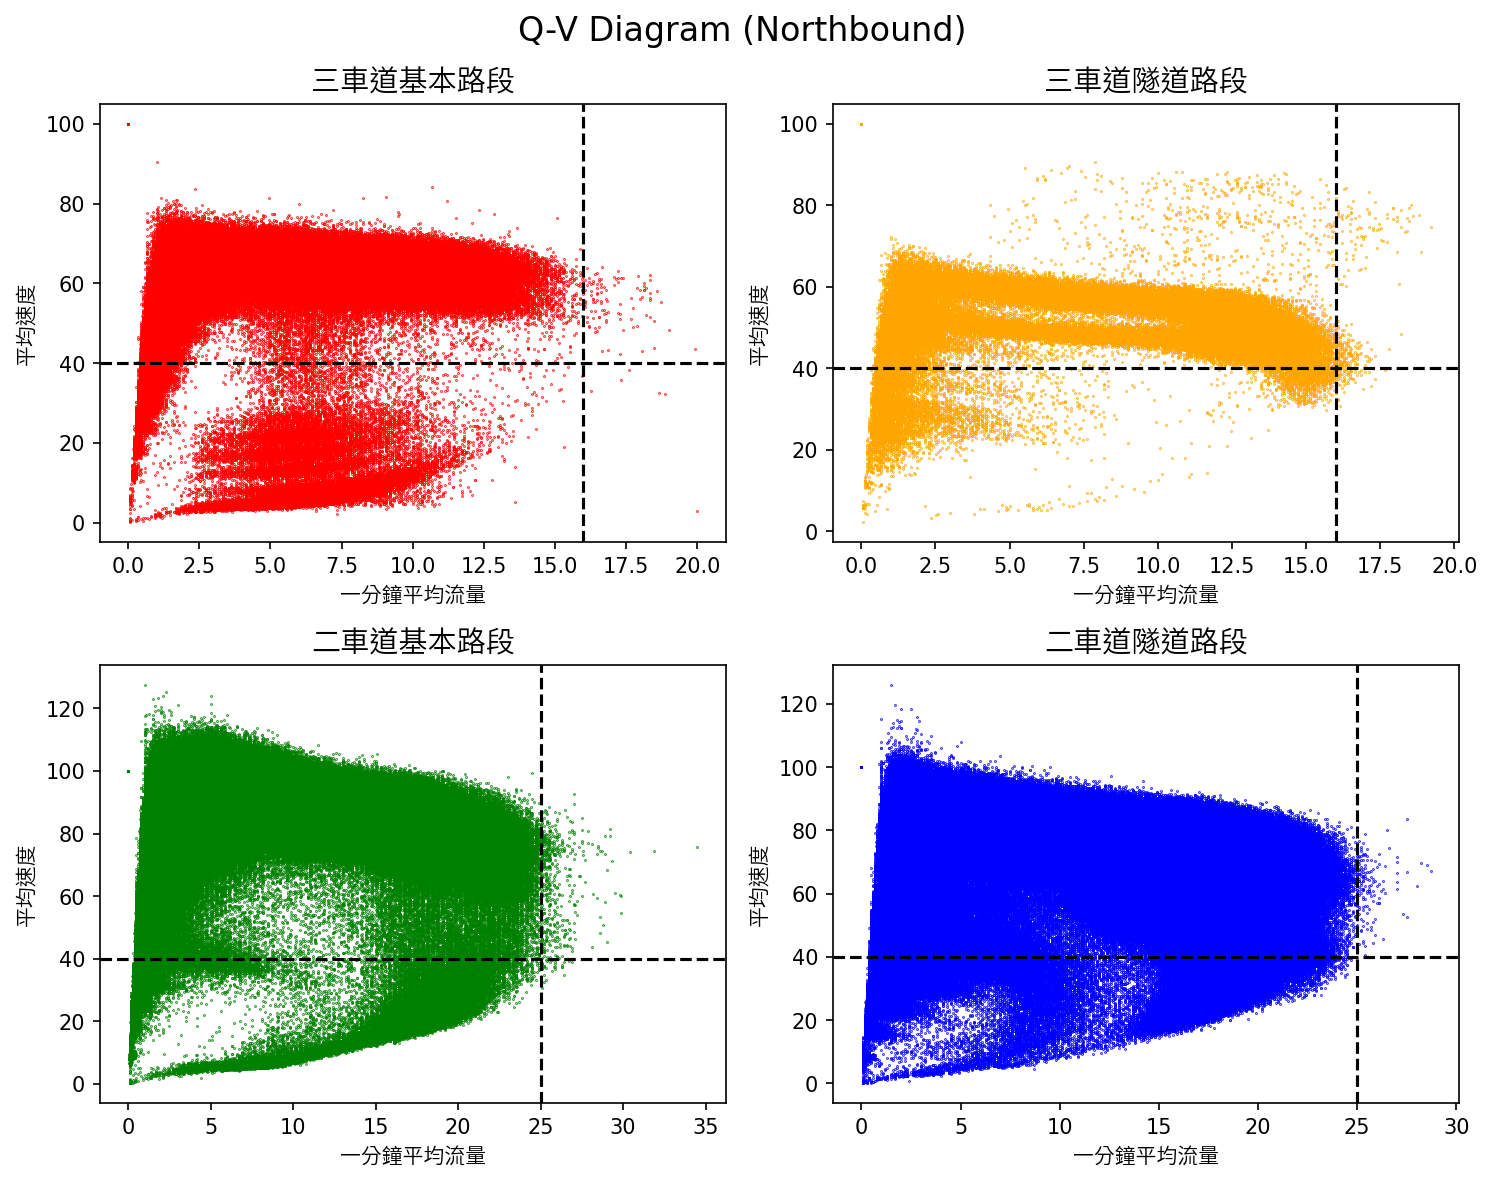

In [5]:
from matplotlib.font_manager import FontProperties as font
chinese_font = font(fname="C:/Hao/特殊字體/SourceHanSansTW/SourceHanSansTW-Normal.otf")

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].scatter(roadType1['Volume'], roadType1['Speed'], s=0.1, color='red')
ax[0, 0].axvline(x=16, color='black', linestyle='--')
ax[0, 0].axhline(y=40, color='black', linestyle='--')
ax[0, 0].set_title('三車道基本路段', fontproperties=chinese_font, fontsize=14)
ax[0, 0].set_xlabel('一分鐘平均流量', fontproperties=chinese_font, fontsize=10)
ax[0, 0].set_ylabel('平均速度', fontproperties=chinese_font, fontsize=10)

ax[0, 1].scatter(roadType2['Volume'], roadType2['Speed'], s=0.1, color='orange')
ax[0, 1].axvline(x=16, color='black', linestyle='--')
ax[0, 1].axhline(y=40, color='black', linestyle='--')
ax[0, 1].set_title('三車道隧道路段', fontproperties=chinese_font, fontsize=14)
ax[0, 1].set_xlabel('一分鐘平均流量', fontproperties=chinese_font, fontsize=10)
ax[0, 1].set_ylabel('平均速度', fontproperties=chinese_font, fontsize=10)

ax[1, 0].scatter(roadType3['Volume'], roadType3['Speed'], s=0.1, color='green')
ax[1, 0].axvline(x=25, color='black', linestyle='--')
ax[1, 0].axhline(y=40, color='black', linestyle='--')
ax[1, 0].set_title('二車道基本路段', fontproperties=chinese_font, fontsize=14)
ax[1, 0].set_xlabel('一分鐘平均流量', fontproperties=chinese_font, fontsize=10)
ax[1, 0].set_ylabel('平均速度', fontproperties=chinese_font, fontsize=10)

ax[1, 1].scatter(roadType4['Volume'], roadType4['Speed'], s=0.1, color='blue')
ax[1, 1].axvline(x=25, color='black', linestyle='--')
ax[1, 1].axhline(y=40, color='black', linestyle='--')
ax[1, 1].set_title('二車道隧道路段', fontproperties=chinese_font, fontsize=14)
ax[1, 1].set_xlabel('一分鐘平均流量', fontproperties=chinese_font, fontsize=10)
ax[1, 1].set_ylabel('平均速度', fontproperties=chinese_font, fontsize=10)

plt.suptitle('Q-V Diagram (Northbound)', fontsize=16)
plt.tight_layout()

In [6]:
roadType1 = filtDf.filter((pl.col('ActualLaneNum')==3) & (pl.col('isTunnel')==0) & (pl.col('RoadDirection')=='S'))
roadType2 = filtDf.filter((pl.col('ActualLaneNum')==3) & (pl.col('isTunnel')==1) & (pl.col('RoadDirection')=='S'))
roadType3 = filtDf.filter((pl.col('ActualLaneNum')==2) & (pl.col('isTunnel')==0) & (pl.col('RoadDirection')=='S'))
roadType4 = filtDf.filter((pl.col('ActualLaneNum')==2) & (pl.col('isTunnel')==1) & (pl.col('RoadDirection')=='S'))

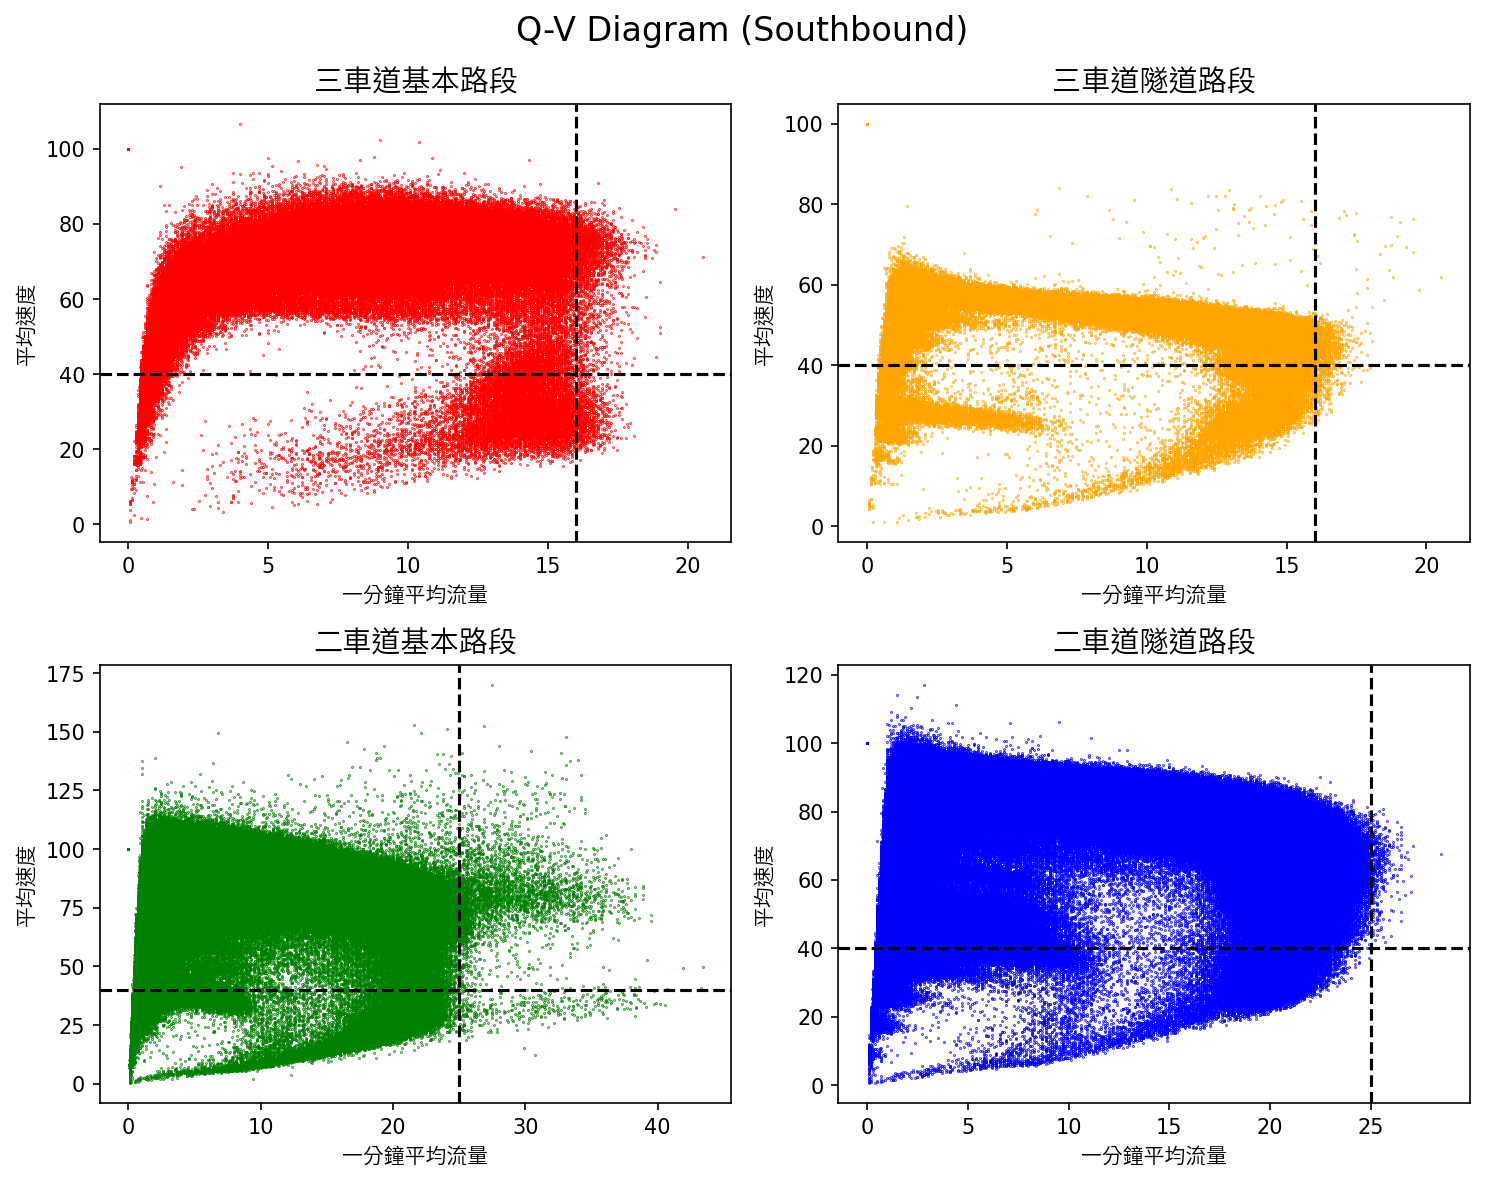

In [7]:
from matplotlib.font_manager import FontProperties as font
chinese_font = font(fname="C:/Hao/特殊字體/SourceHanSansTW/SourceHanSansTW-Normal.otf")

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].scatter(roadType1['Volume'], roadType1['Speed'], s=0.1, color='red')
ax[0, 0].axvline(x=16, color='black', linestyle='--')
ax[0, 0].axhline(y=40, color='black', linestyle='--')
ax[0, 0].set_title('三車道基本路段', fontproperties=chinese_font, fontsize=14)
ax[0, 0].set_xlabel('一分鐘平均流量', fontproperties=chinese_font, fontsize=10)
ax[0, 0].set_ylabel('平均速度', fontproperties=chinese_font, fontsize=10)

ax[0, 1].scatter(roadType2['Volume'], roadType2['Speed'], s=0.1, color='orange')
ax[0, 1].axvline(x=16, color='black', linestyle='--')
ax[0, 1].axhline(y=40, color='black', linestyle='--')
ax[0, 1].set_title('三車道隧道路段', fontproperties=chinese_font, fontsize=14)
ax[0, 1].set_xlabel('一分鐘平均流量', fontproperties=chinese_font, fontsize=10)
ax[0, 1].set_ylabel('平均速度', fontproperties=chinese_font, fontsize=10)

ax[1, 0].scatter(roadType3['Volume'], roadType3['Speed'], s=0.1, color='green')
ax[1, 0].axvline(x=25, color='black', linestyle='--')
ax[1, 0].axhline(y=40, color='black', linestyle='--')
ax[1, 0].set_title('二車道基本路段', fontproperties=chinese_font, fontsize=14)
ax[1, 0].set_xlabel('一分鐘平均流量', fontproperties=chinese_font, fontsize=10)
ax[1, 0].set_ylabel('平均速度', fontproperties=chinese_font, fontsize=10)

ax[1, 1].scatter(roadType4['Volume'], roadType4['Speed'], s=0.1, color='blue')
ax[1, 1].axvline(x=25, color='black', linestyle='--')
ax[1, 1].axhline(y=40, color='black', linestyle='--')
ax[1, 1].set_title('二車道隧道路段', fontproperties=chinese_font, fontsize=14)
ax[1, 1].set_xlabel('一分鐘平均流量', fontproperties=chinese_font, fontsize=10)
ax[1, 1].set_ylabel('平均速度', fontproperties=chinese_font, fontsize=10)

plt.suptitle('Q-V Diagram (Southbound)', fontsize=16)
plt.tight_layout()